In [38]:
import pandas as pd                     # for dataset manipulation (DataFrames)
import sklearn.datasets                 # the datasets we are going to use
import numpy as np                      # allows some mathematical operations
import matplotlib.pyplot as plt         # library used to display graphs
import seaborn as sns                   # more convenient visualization library for dataframes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from pycaret.classification import*

In [39]:
df = pd.read_csv("heart.csv")

In [40]:
df.head() #Visualisation de la base de données

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df.describe() #Description des données

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [42]:
df.info() #Pour connaitre le nombre de valeurs non nul et le types de valeurs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [43]:
df.shape #connaitre la taille des données

(303, 14)

In [44]:
df.sex.value_counts()

#Les données sont déséquilibrées pour le sexe

1 207
0 96
Name: sex, dtype: int64

In [45]:
df.columns

#Age : Age of the patient
#Sex : Sex of the patient
#exang: exercise induced angina (1 = yes; 0 = no)
#ca: number of major vessels (0-3)
#cp : Chest Pain type chest pain type
#Value 1: typical angina
    #Value 2: atypical angina
    #Value 3: non-anginal pain
    #Value 4: asymptomatic
#trtbps : resting blood pressure (in mm Hg)
#chol : cholestoral in mg/dl fetched via BMI sensor
#fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#rest_ecg : resting electrocardiographic results
    #Value 0: normal
    #Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    #Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#thalach : maximum heart rate achieved
#target : 0= less chance of heart attack 1= more chance of heart attack

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Plot')

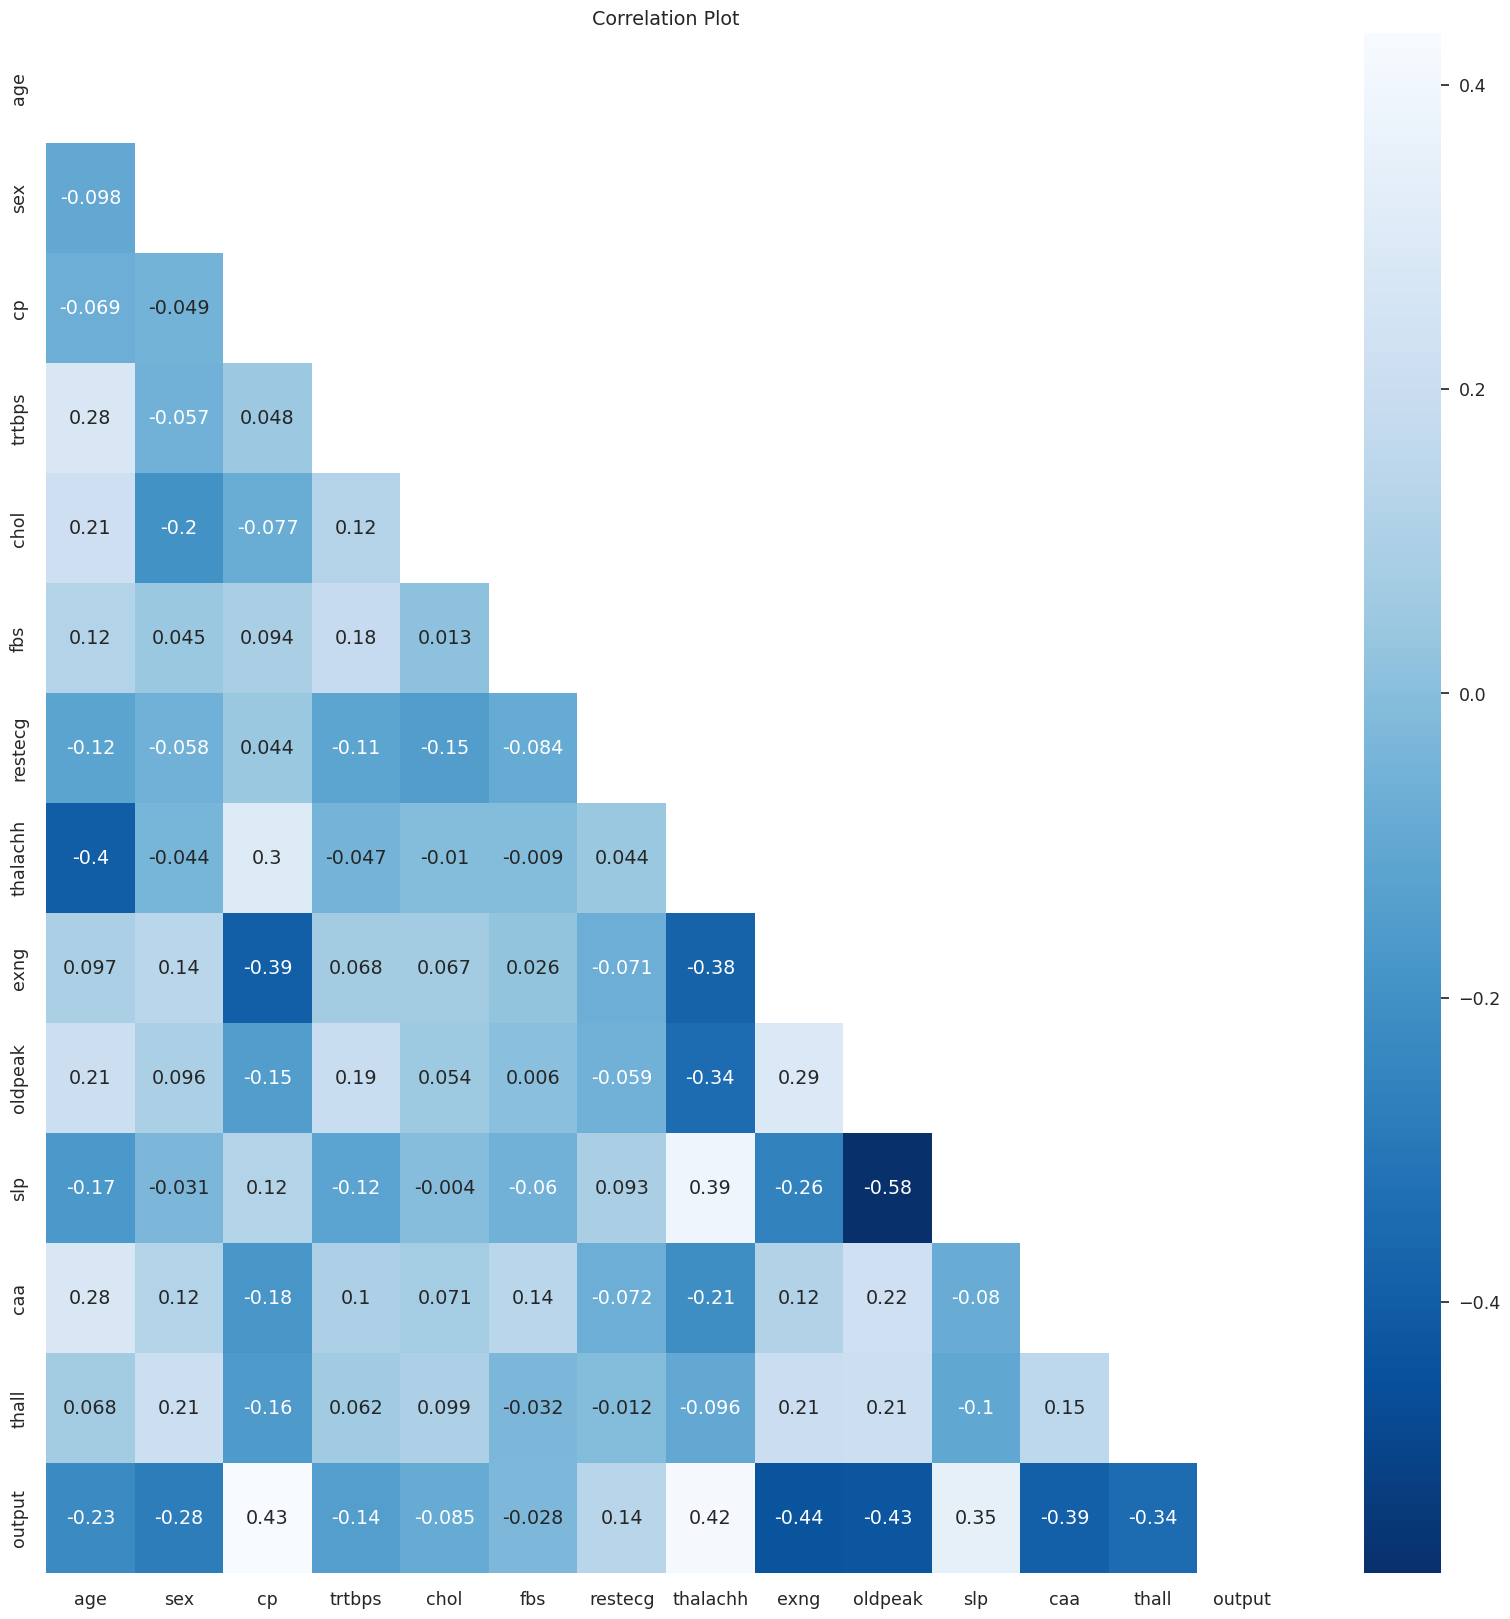

In [46]:
#Connaissance de la manière dont les données vont ensemble

corr=df.corr().round(3)

sns.set(font_scale=1.15)
plt.figure(figsize=(20, 20))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='Blues_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

<Axes: xlabel='output', ylabel='count'>

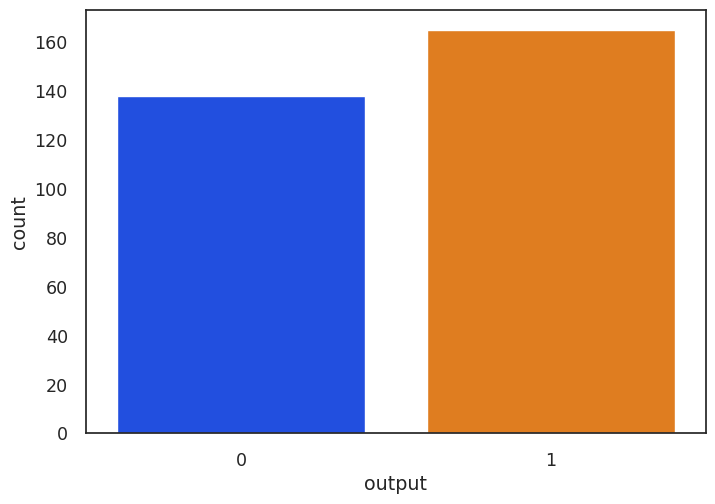

In [47]:
sns.countplot(x = "output", data = df) #Connaître le nombre d'outputs

<Axes: xlabel='sex', ylabel='count'>

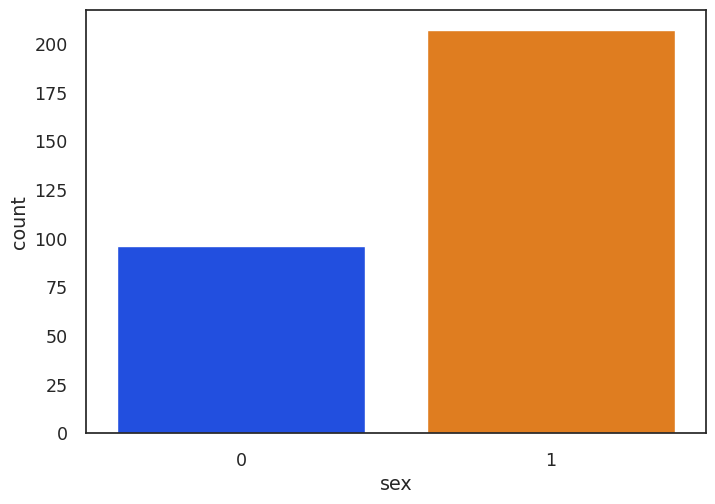

In [48]:
sns.countplot(x = "sex", data = df) #Avoir une réprésentation visuel du déséquilibre entre le genre

In [49]:
#Division des données d'entraînement et de test

X = df.drop("output", axis=1)
y = df["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#Utilisation du modèle RandomForest
model = RandomForestClassifier()

In [51]:
#Entraînement du modèle
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
 criterion='gini', max_depth=None, max_features='sqrt',
 max_leaf_nodes=None, max_samples=None,
 min_impurity_decrease=0.0, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=100, n_jobs=None, oob_score=False,
 random_state=None, verbose=0, warm_start=False) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomForestClassifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
 criterion='gini', max_depth=None, max_features='sqrt',
 max_leaf_nodes=None, max_samples=None,
 min_impurity_decrease=0.0, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=100, n_jobs=None, oob_score=False,
 random_state=None, verbose=0, warm_start=False)

In [52]:
#Evaluation des performances du modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Précision du modèle :", accuracy)
print("Rapport de classification :")
print(report)

Précision du modèle : 0.8524590163934426
Rapport de classification :
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [53]:
#Essai du modèle sur de nouvelle donnés inconnues
new_data = pd.DataFrame({
    "age": [50],
    "sex": [1],
    "cp": [2],
    "trtbps": [130],
    "chol": [220],
    "fbs": [125],
    "restecg": [1],
    "thalachh": [190],
    "exng" : [0],
    "oldpeak": [3.0],
    "slp" : [2],
    "caa": [2],
    "thall": [2]
})

In [54]:
new_predictions = model.predict(new_data)
print("Prédictions pour de nouvelles données :", new_predictions)

Prédictions pour de nouvelles données : [1]


In [55]:
#Utilisation du modèle de regression logistique
model = LogisticRegression(max_iter = 1000)

In [56]:
#Entraînement du modèle
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, l1_ratio=None, max_iter=1000,
 multi_class='auto', n_jobs=None, penalty='l2',
 random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
 warm_start=False) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LogisticRegression LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, l1_ratio=None, max_iter=1000,
 multi_class='auto', n_jobs=None, penalty='l2',
 random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
 warm_start=False)

In [57]:
#Evaluation des performances du modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Précision du modèle :", accuracy)
print("Rapport de classification :")
print(report)

Précision du modèle : 0.8852459016393442
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [58]:
#Prédictions sur de nouvelles données
new_predictions = model.predict(new_data)
print("Prédictions pour de nouvelles données :", new_predictions)

Prédictions pour de nouvelles données : [1]


In [61]:
#Installation de la bibliothèque xgboost
pip install xgboost

SyntaxError: SyntaxError: invalid syntax

In [62]:
#Création et entraînement du modèle XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
 colsample_bylevel=None, colsample_bynode=None,
 colsample_bytree=None, early_stopping_rounds=None,
 enable_categorical=False, eval_metric=None, feature_types=None,
 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
 interaction_constraints=None, learning_rate=None, max_bin=None,
 max_cat_threshold=None, max_cat_to_onehot=None,
 max_delta_step=None, max_depth=None, max_leaves=None,
 min_child_weight=None, missing=nan, monotone_constraints=None,
 n_estimators=100, n_jobs=None, num_parallel_tree=None,
 objective='binary:logistic', predictor=None, ...) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. XGBClassifier XGBClassifier(base_score=None, booster=None, callbacks=None,
 colsample_bylevel=None, colsample_bynode=None,
 colsample_bytree=None, early_stopping_rounds=None,
 enable_categorical=False, eval_metric=None, feature_types=None,
 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
 interaction_constraints=None, learning_rate=None, max_bin=None,
 max_cat_threshold=None, max_cat_to_onehot=None,
 max_delta_step=None, max_depth=None, max_leaves=None,
 min_child_weight=None, missing=nan, monotone_constraints=None,
 n_estimators=100, n_jobs=None, num_parallel_tree=None,
 objective='binary:logistic', predictor=None, ...)

In [24]:
#Evaluation des performances du modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Précision du modèle :", accuracy)
print("Rapport de classification :")

print(report)

Précision du modèle : 0.819672131147541
Rapport de classification :
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [37]:
#Installation de la bibliothèque pycaret
pip install pycaret

SyntaxError: SyntaxError: invalid syntax

In [63]:
setup(df, target="output") #Initialitiation de l'environnement
top5 = compare_models() #Appelation de la fonction pour comparer les différents modèles

,Description,Value
0,Session id,4581
1,Target,output
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8489,0.9114,0.9030,0.8391,0.8657,0.6922,0.7026,0.2480
et,Extra Trees Classifier,0.8439,0.9143,0.8492,0.8648,0.8529,0.6847,0.6917,0.1870
ridge,Ridge Classifier,0.8340,0.0000,0.9106,0.8101,0.8549,0.6609,0.6748,0.0260
lda,Linear Discriminant Analysis,0.8340,0.8981,0.9106,0.8101,0.8549,0.6609,0.6748,0.0380
lr,Logistic Regression,0.8292,0.9128,0.8924,0.8142,0.8477,0.6519,0.6658,0.2970
nb,Naive Bayes,0.8149,0.8906,0.8402,0.8249,0.8290,0.6254,0.6316,0.0310
gbc,Gradient Boosting Classifier,0.7974,0.8669,0.8432,0.8013,0.8158,0.5897,0.6019,0.1120
xgboost,Extreme Gradient Boosting,0.7972,0.8885,0.8424,0.8027,0.8154,0.5889,0.6011,0.0870
lightgbm,Light Gradient Boosting Machine,0.7972,0.8935,0.8432,0.8036,0.8169,0.5871,0.5995,1.5160
qda,Quadratic Discriminant Analysis,0.7965,0.8879,0.7871,0.8305,0.8006,0.5914,0.6022,0.0290


In [27]:
#Création et entrînement du modèle Naives_bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GaussianNB GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
#Evaluation des performances du modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Précision du modèle :", accuracy)
print("Rapport de classification :")
print(report)

Précision du modèle : 0.8688524590163934
Rapport de classification :
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
'''
En se basant sur les performances des modèles de prédiction des maladies cardiaques évalués (Random Forest, Régression Logistique, XGBoost...), voici une conclusion possible :

La Régression Logistique a démontré la meilleure performance parmi les modèles évalués en termes de précision, rappel et F1-score pour la prédiction des maladies cardiaques. Avec une précision de 88.5%, un rappel de 91% pour la classe 1, et un F1-score de 0.89, ce modèle est capable de prédire avec succès la probabilité de maladies cardiaques chez les patients.

Le modèle Random Forest a également donné de bons résultats avec une précision de 85.2% et un rappel de 88% pour la classe 1. Les mesures de performance sont généralement équilibrées, indiquant une capacité solide à prédire la maladie cardiaque.

Le modèle XGBoost a donné des performances légèrement inférieures aux deux autres modèles, avec une précision de 82% et un rappel de 78% pour la classe 1. Cependant, il reste un modèle raisonnablement efficace pour la prédiction des maladies cardiaques.

Il est essentiel de noter que le choix du modèle dépend de divers facteurs, y compris les besoins spécifiques de l'application, la facilité d'interprétation du modèle, la complexité, et d'autres considérations. La Régression Logistique, en tant que modèle linéaire simple, est à la fois puissante et interprétable, ce qui peut la rendre appropriée dans un contexte clinique où l'interprétabilité est essentielle.

Cependant, pour une application en temps réel ou lorsque des performances plus élevées sont nécessaires, le modèle Random Forest peut être une alternative valable en raison de ses performances solides.
'''